In [31]:
import graphviz
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
from IPython.display import Image

In [32]:
root = Node("4")

node2 = Node("2", parent=root)
node1 = Node("1", parent=node2)
node3 = Node("3", parent=node2)

node6 = Node("6", parent=root)
# node7 = Node("7", parent=node6) insertion order matters
# it creates:
#   6
#  / \
# 7   5
node5 = Node("5", parent=node6)
# node5 = Node("7", parent=node6) # we must uniquely identify the node
node7 = Node("7", parent=node6)
# order of insertion matters
# it creates:
#   6
#  / \
# 5   7


In [33]:
print(root.name)

4


In [34]:
for pre, fill, node in RenderTree(root):
    print(f"{pre}{node.name}")

4
├── 2
│   ├── 1
│   └── 3
└── 6
    ├── 5
    └── 7


In [35]:
def preorder(node):
    if not node:
        return
    print(node.name, end=" ")
    for child in node.children:
        preorder(child)


def inorder(node):
    if not node:
        return

    children = node.children
    if len(children) > 0:
        inorder(children[0])
    print(node.name, end=" ")
    if len(children) > 1:
        inorder(children[1])


def postorder(node):
    if not node:
        return
    for child in node.children:
        postorder(child)
    print(node.name, end=" ")

In [36]:
preorder(root)

4 2 1 3 6 5 7 

In [37]:
inorder(root)

1 2 3 4 5 6 7 

In [38]:
postorder(root)

1 3 2 5 7 6 4 

In [39]:
DotExporter(root).to_picture("tree_visualization.png")
print("\nTree visualization saved as 'tree_visualization.png'")


Tree visualization saved as 'tree_visualization.png'


In [40]:
def create_graphviz_tree():
    dot = graphviz.Digraph(format="png")

    def add_nodes_edges(node: Node):
        dot.node(node.name)
        for child in node.children:
            dot.edge(node.name, child.name)
            add_nodes_edges(child)

    add_nodes_edges(root)
    dot.render("manual_tree_visualization")
    print("\nManual tree visualization saved as 'manual_tree_visualization.png'")


create_graphviz_tree()


Manual tree visualization saved as 'manual_tree_visualization.png'


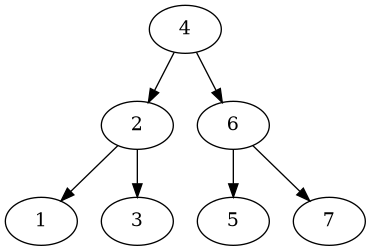

In [41]:
Image("manual_tree_visualization.png")

In [42]:
class A:
    def __init__(self):
        self.x = [1, 2, 3]

    def __len__(self):
        return len(self.x)

    def __id__(self):
        return str(id(self.x)) + "felipe"


a = A()
print(len(a))
print(id(a))

3
139643893230640
